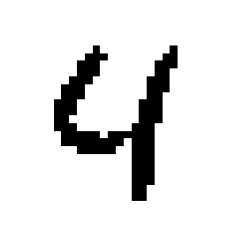

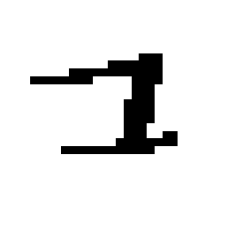

CPU times: user 8.87 ms, sys: 91 µs, total: 8.96 ms
Wall time: 8.98 ms
CPU times: user 2.96 s, sys: 0 ns, total: 2.96 s
Wall time: 2.97 s


In [1]:
%run ../functions.ipynb ;

In [27]:
def learning_step(mps, index, imgs, lr):
    
    Z = mps @ mps
    A = (mps.tensors[index] @ mps.tensors[index+1])
    # print('######################\nSTEP: {}'.format(index) )
    # print('A: {}'.format(A.data.shape) )
    
    psifrac = 0
    for img in imgs:
        num = computepsiprime(mps,img,index)
        den = computepsi(mps,img)
        
        psifrac = psifrac + num/den
    
    psifrac = psifrac/imgs.shape[0]
    
    # print('A\': {}'.format(A.data.shape) )
    # print('psiprime: {}\n'.format(psifrac.shape) )
    dNLL = (A/Z) - psifrac
    
    A = A + lr*dNLL
    
    SD = A.split(['i'+str(index-1),'v'+str(index)], absorb='right')
    
    return SD

In [35]:
mps = initialize_mps(bdim=30)

In [36]:
imgs = train_set[:2]

In [37]:
progress = tqdm(range(1,len(mps.tensors)-2))

  0%|                                                   | 0/781 [00:00<?, ?it/s]

In [38]:
for index in progress:
    A = learning_step(mps,index,imgs,0.08)
    
    mps.tensors[index].modify(data=np.transpose(A.tensors[0].data,(0,2,1)))
    mps.tensors[index+1].modify(data=A.tensors[1].data)
    
    p0 = computepsi(mps,imgs[0])**2
    progress.set_description('P(0) = {}'.format(p0))

P(0) = 1.7605912438336424e-06: 100%|██████████| 781/781 [04:47<00:00,  2.72it/s]


In [ ]:
computepsi(mps,imgs[0])**2

In [ ]:
computepsi(mps,np.random.randint(0,2,(784)) )**2

In [13]:
smallmps = initialize_mps(Ldim=10,bdim=30)

In [14]:
smallimgs = train_set[:10, 500:510]

In [15]:
small_progress = tqdm(range(1,len(smallmps.tensors)-2))

  0%|                                                     | 0/7 [00:00<?, ?it/s]

In [18]:
for index in small_progress:
    smallmps.show()
    
    A = learning_step(smallmps,index,smallimgs,0.08)
    
    smallmps.tensors[index].modify(data=np.transpose(A.tensors[0].data,(0,2,1)))
    smallmps.tensors[index+1].modify(data=A.tensors[1].data)
    
    p0 = computepsi(smallmps,smallimgs[0])**2
    small_progress.set_description('P(0) = {}'.format(p0))

 2 4 8 30 30 16 8 4 2 
>─>─>─●──<──<──<─<─<─<
│ │ │ │  │  │  │ │ │ │
######################
STEP: 1
A: (2, 2, 8, 2)
A': (2, 2, 8, 2)
psiprime: (2, 2, 8, 2)

 2 4 8 30 30 16 8 4 2 
>─>─●─●──<──<──<─<─<─<
│ │ │ │  │  │  │ │ │ │
######################
STEP: 2
A: (4, 2, 30, 2)
A': (4, 2, 30, 2)
psiprime: (4, 2, 30, 2)

 2 4 8 30 30 16 8 4 2 
>─>─>─●──<──<──<─<─<─<
│ │ │ │  │  │  │ │ │ │
######################
STEP: 3
A: (8, 2, 30, 2)
A': (8, 2, 30, 2)
psiprime: (8, 2, 30, 2)

 2 4 8 16 30 16 8 4 2 
>─>─>─>──●──<──<─<─<─<
│ │ │ │  │  │  │ │ │ │
######################
STEP: 4
A: (16, 2, 16, 2)
A': (16, 2, 16, 2)
psiprime: (16, 2, 16, 2)

 2 4 8 16 31 16 8 4 2 
>─>─>─>──>──●──<─<─<─<
│ │ │ │  │  │  │ │ │ │
######################
STEP: 5
A: (31, 2, 8, 2)
A': (31, 2, 8, 2)
psiprime: (31, 2, 8, 2)

 2 4 8 16 31 16 8 4 2 
>─>─>─>──>──>──●─<─<─<
│ │ │ │  │  │  │ │ │ │
######################
STEP: 6
A: (16, 2, 4, 2)
A': (16, 2, 4, 2)
psiprime: (16, 2, 4, 2)

 2 4 8 16 31 16 8 4 2 
>─>─>─>──>──>──>─